# Data Preparation

In [1]:
# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Getting data ready to be used with Machine Learning
Three main things that we have to do:
1. Split the data into features and labels (usually 'X' and 'y').
2. Filling (also called imputing) or disregarding missing values.
3. Converting non numerical values to numerical values (also known feature encoding).

In [6]:
heart_disease = pd.read_csv("assets/heart-disease.csv")
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
X = heart_disease.drop("target", axis = 1)

In [8]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [9]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [13]:
# Split the data into training and test sets so that the model doesn't know the final results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # Test set is 20% of the total data

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [17]:
X.shape # 303 total 

(303, 13)

### Make sure all the data is Numerical

In [18]:
car_sales = pd.read_csv("assets/car-sales-extended.csv")

In [19]:
car_sales.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

In [20]:
len(car_sales)

1000

In [22]:
# Split the data into X and y
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train) # Machine learning model can't deal with strings
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

In [29]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_X)

0    1    2    3    4    5    6    7    8    9    10   11        12
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0

[1000 rows x 13 columns]

In [31]:
X

Make Colour  Odometer (KM)  Doors
0     Honda  White          35431      4
1       BMW   Blue         192714      5
2     Honda  White          84714      4
3    Toyota  White         154365      4
4    Nissan   Blue         181577      3
..      ...    ...            ...    ...
995  Toyota  Black          35820      4
996  Nissan  White         155144      3
997  Nissan   Blue          66604      4
998   Honda  White         215883      4
999  Toyota   Blue         248360      4

[1000 rows x 4 columns]

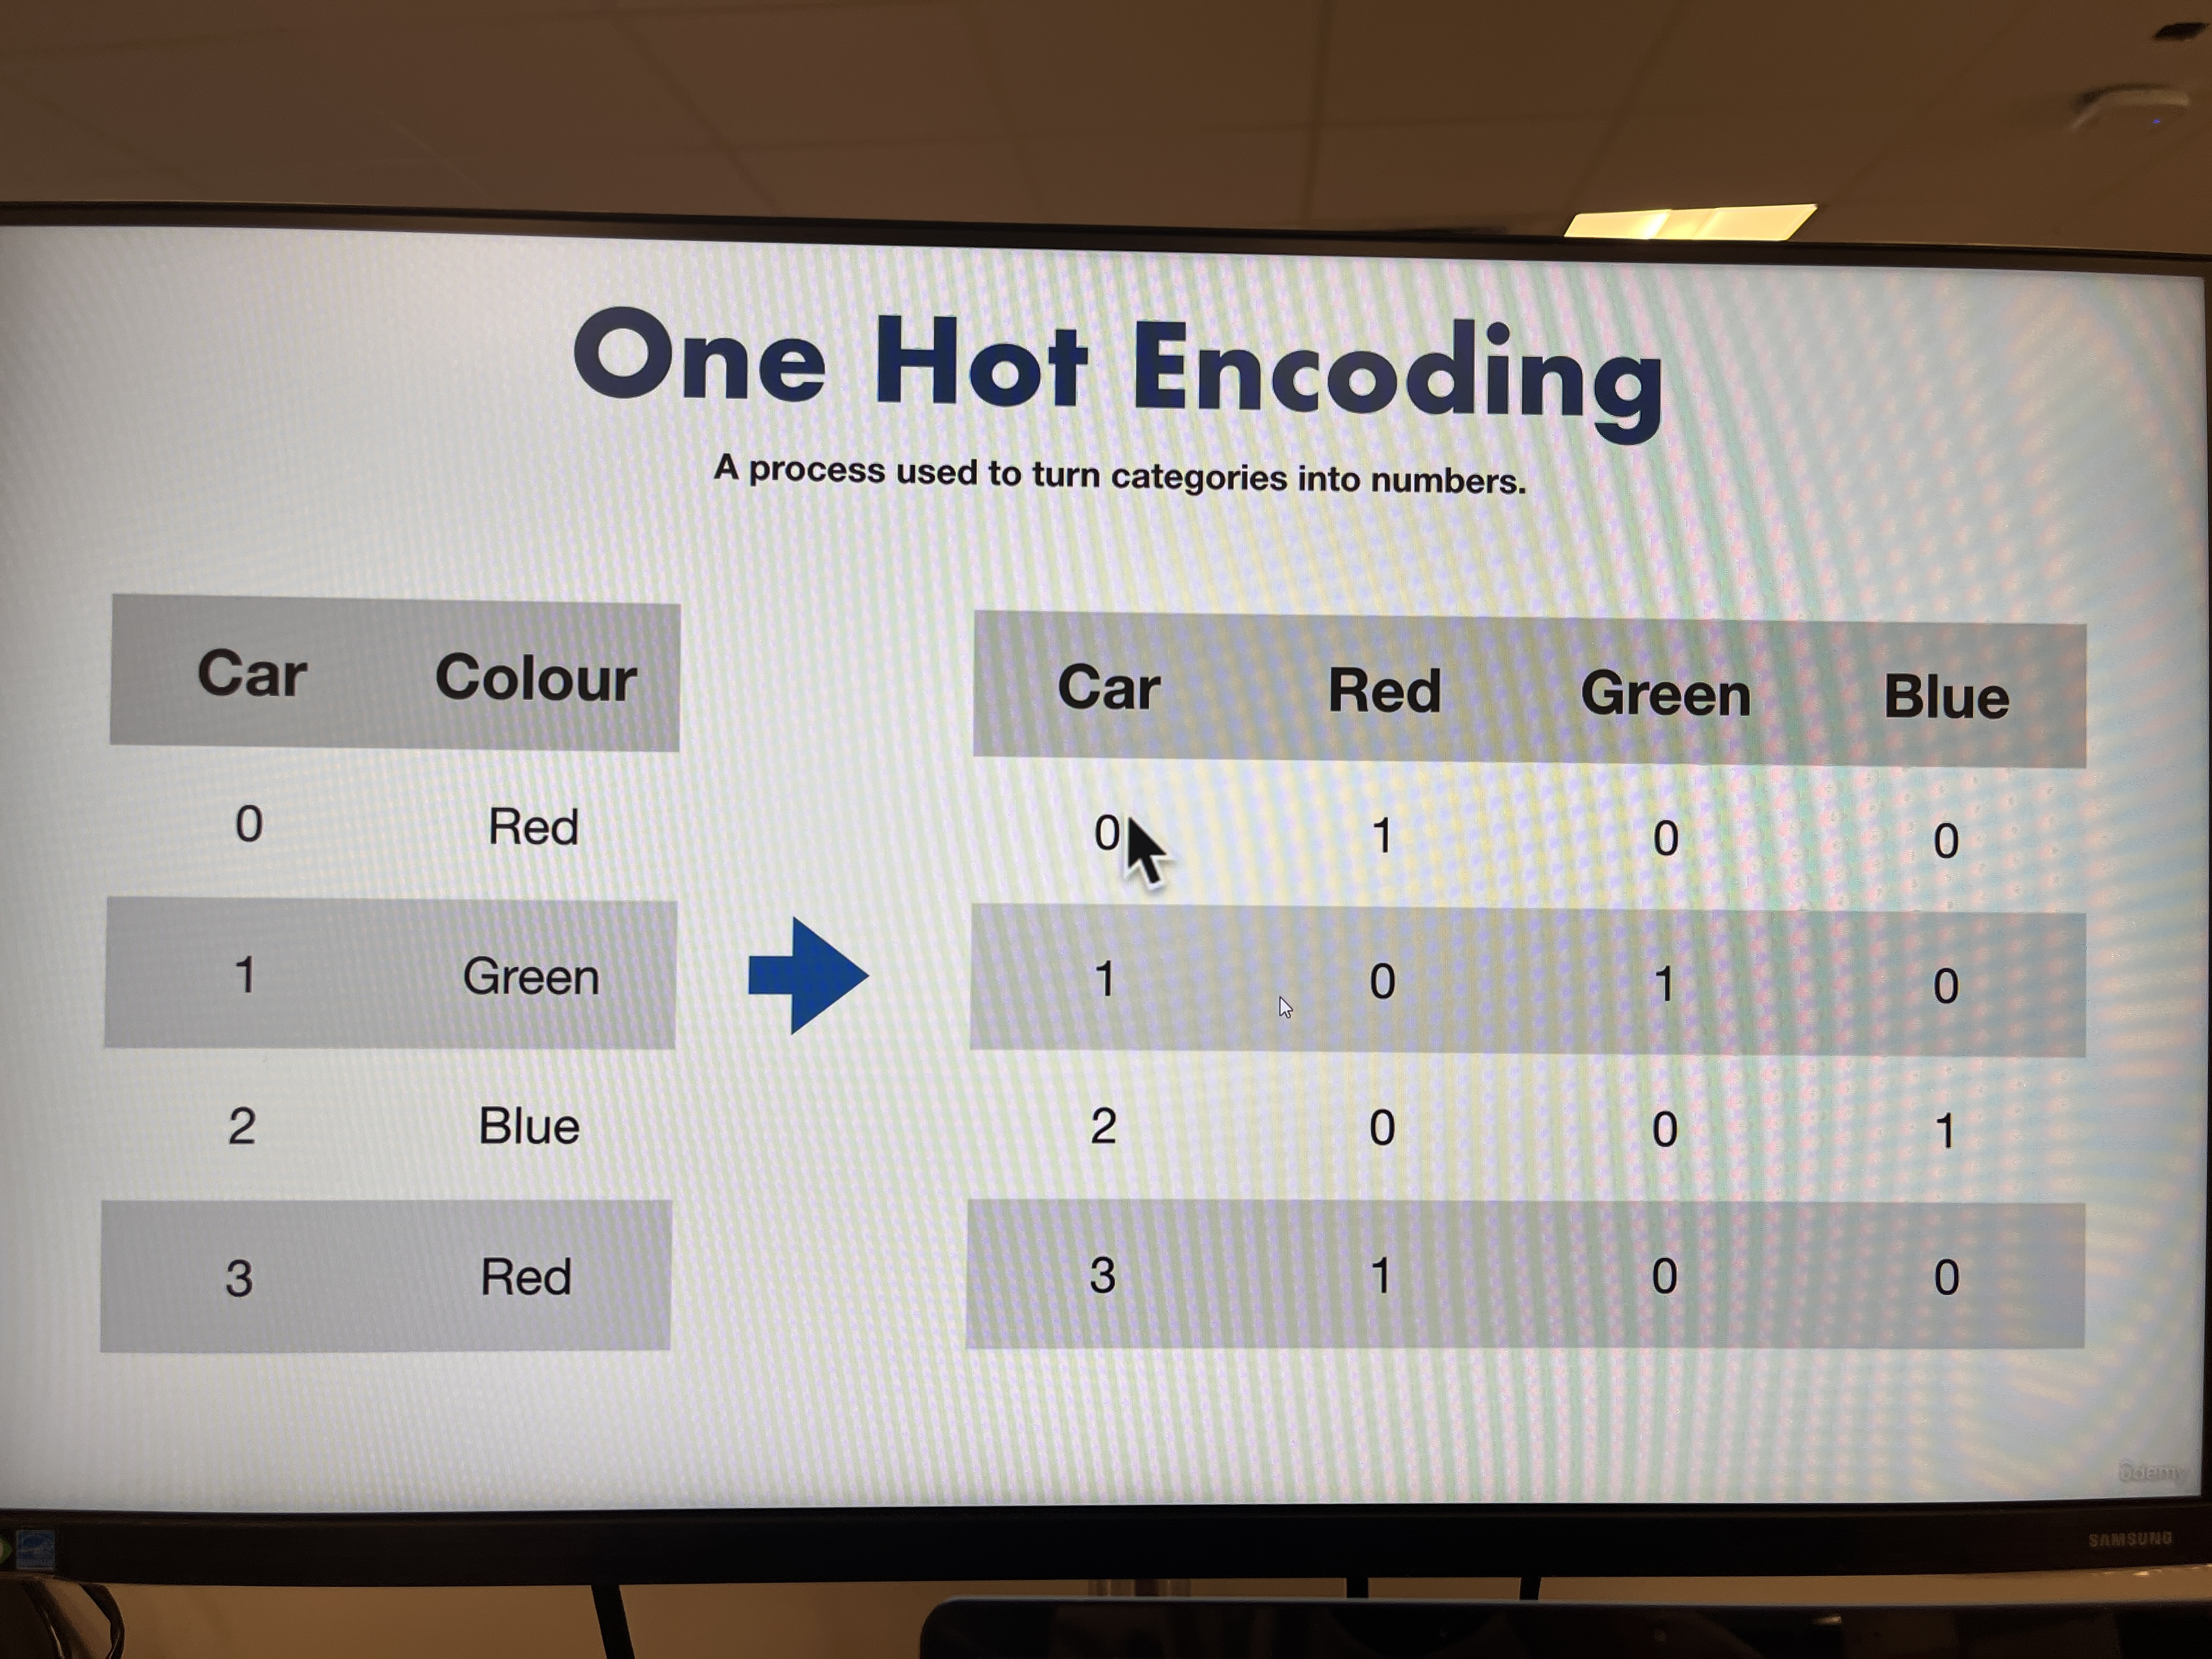

In [32]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

Doors  Make_BMW  Make_Honda  Make_Nissan  Make_Toyota  Colour_Black  \
0        4     False        True        False        False         False   
1        5      True       False        False        False         False   
2        4     False        True        False        False         False   
3        4     False       False        False         True         False   
4        3     False       False         True        False         False   
..     ...       ...         ...          ...          ...           ...   
995      4     False       False        False         True          True   
996      3     False       False         True        False         False   
997      4     False       False         True        False         False   
998      4     False        True        False        False         False   
999      4     False       False        False         True         False   

     Colour_Blue  Colour_Green  Colour_Red  Colour_White  
0          False         False       False          True  
1           True         False       False         False  
2          False         False       False          True  
3          False         False       False          True  
4           True         False       False         False  
..           ...           ...         ...           ...  
995        False         False       False         False  
996        False         False       False          True  
997         True         False       False         False  
998        False         False       False          True  
999         True         False       False         False  

[1000 rows x 10 columns]

In [33]:
# Refitting the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### Feature Scaling
It is the process of making sure that all of your numerical data is on the same scale. The two main types of feature scaling are:
- Normalization (also called min-max scaling): This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.
- Standardization: This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the features by standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

##### NOTE:
- Feature scaling isn't usually required for your target variable.
- Feature scaling isn't usually required with tree-based models like RandomForest since they can handle varying features.

### Dealing with Missing Data
1. Imputation: Fill with some value
2. Remove the samples with missing data altogether

In [35]:
# Import car sales missing data
car_sales_missing = pd.read_csv("assets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [40]:
transformed_X.shape

(1000, 16)

In [41]:
car_sales_missing["Make"].fillna("missing", inplace = True)
car_sales_missing["Colour"].fillna("missing", inplace = True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)
car_sales_missing["Doors"].fillna(4, inplace = True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [42]:
car_sales_missing.dropna(inplace=True)
car_sales_missing

Make Colour  Odometer (KM)  Doors    Price
0      Honda  White        35431.0    4.0  15323.0
1        BMW   Blue       192714.0    5.0  19943.0
2      Honda  White        84714.0    4.0  28343.0
3     Toyota  White       154365.0    4.0  13434.0
4     Nissan   Blue       181577.0    3.0  14043.0
..       ...    ...            ...    ...      ...
995   Toyota  Black        35820.0    4.0  32042.0
996  missing  White       155144.0    3.0   5716.0
997   Nissan   Blue        66604.0    4.0  31570.0
998    Honda  White       215883.0    4.0   4001.0
999   Toyota   Blue       248360.0    4.0  12732.0

[950 rows x 5 columns]

In [49]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [51]:
pd.DataFrame(transformed_X)

0
0      (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
1      (0, 0)\t1.0\n  (0, 6)\t1.0\n  (0, 13)\t1.0\n...
2      (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
3      (0, 3)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
4      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 11)\t1.0\n...
..                                                 ...
945    (0, 3)\t1.0\n  (0, 5)\t1.0\n  (0, 12)\t1.0\n...
946    (0, 4)\t1.0\n  (0, 9)\t1.0\n  (0, 11)\t1.0\n...
947    (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...
948    (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
949    (0, 3)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...

[950 rows x 1 columns]

In [52]:
car_sales_missing = pd.read_csv("assets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [53]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
len(car_sales_missing)

950

In [54]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [58]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

Make Colour Doors Odometer (KM)
0   Honda  White   4.0       35431.0
1     BMW   Blue   5.0      192714.0
2   Honda  White   4.0       84714.0
3  Toyota  White   4.0      154365.0
4  Nissan   Blue   3.0      181577.0

In [59]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [60]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [62]:
# Now we have our data as numbers
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944